**Install PyDrive**

In [1]:
# PyDrive dependencies which is used for importing data set from google drive

# !pip install -U -q PyDrive

# Import modules
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:


# Data dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns

from sklearn.model_selection import train_test_split
import xgboost as xgb

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

In [0]:
# data_set = drive.CreateFile({'id':"driver_file_id"})
# data_set.GetContentFile('pima-data.csv')

In [ ]:
data_frame = pd.read_csv('datasets/pima-data.csv')
data_frame.head(3)

In [8]:
print(data_frame.isnull()) # Replace all values with ture/false
print(data_frame.isnull().values) # Makes an array with true/false value
print(data_frame.isnull().values.any()) # checks is there any cell empty or not, returns false if not empty

     num_preg  glucose_conc  diastolic_bp  ...    age   skin  diabetes
0       False         False         False  ...  False  False     False
1       False         False         False  ...  False  False     False
2       False         False         False  ...  False  False     False
3       False         False         False  ...  False  False     False
4       False         False         False  ...  False  False     False
5       False         False         False  ...  False  False     False
6       False         False         False  ...  False  False     False
7       False         False         False  ...  False  False     False
8       False         False         False  ...  False  False     False
9       False         False         False  ...  False  False     False
10      False         False         False  ...  False  False     False
11      False         False         False  ...  False  False     False
12      False         False         False  ...  False  False     False
13    

In [0]:
#Correlation Mattrix Heatmapt
#Heat map generator function
def corr_heatmap(data_frame, size = 11): #here size means plot size
    correlation = data_frame.corr()

    #dividing the plot into subplots for increasing size of plots
    fig, heatmap = plt.subplots(figsize=(size, size))
    #plotting the correlation heatmap
    heatmap.matshow(correlation)

    #adding xticks yticks
    plt.xticks(range(len(correlation.columns)), correlation.columns)
    plt.yticks(range(len(correlation.columns)), correlation.columns)

    #Display the graph
    plt.show()

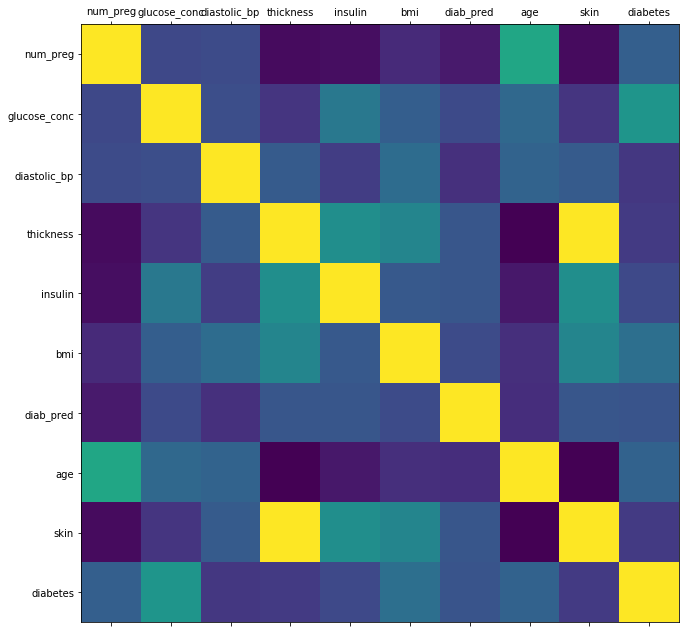

In [10]:
corr_heatmap(data_frame)

In [11]:
# now deleting duplicate column butween 'skin' and 'thikness'
del data_frame['skin']
#checking if the action was successful or not
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [12]:
#Mapping the values
map_diabetes = {True: 1, False: 0}

#Setting the map to the data_frame
data_frame['diabetes'] = data_frame['diabetes'].map(map_diabetes)

#Let's see what we have done
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
map_diabetes = {True}

In [14]:
num_true = 0.0
num_false = 0.0
for item in data_frame['diabetes']:
    if item == True:
        num_true += 1
    else:
        num_false += 1
        
percent_true = (num_true / (num_true + num_false)) * 100
percent_false = (num_false / (num_true + num_false)) * 100
print("Number of True Cases: {0} ({1:2.2f}%)".format(num_true, percent_true))
print("Number of False Cases: {0} ({1:2.2f}%)".format(num_false, percent_false))

# Another way/pythonic way
# num_true = len(data_frame.loc[data_frame['diabetes'] == True])
# num_false = len(data_frame.loc[data_frame['diabetes'] == False])
# print "Number of True Cases: {0} ({1:2.2f}%)".format(num_true, ((float)num_true / (num
# _true + num_false)) * 100)
# print "Number of False Cases: {0} ({1:2.2f}%)".format(num_false, ((float)num_true / (n
# um_true + num_false)) * 100)

Number of True Cases: 268.0 (34.90%)
Number of False Cases: 500.0 (65.10%)


In [0]:
from sklearn.model_selection import train_test_split
feature_column_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_name = ['diabetes']
# Getting feature variable values
X = data_frame[feature_column_names].values
y = data_frame[predicted_class_name].values
# Saving 30% for testing
split_test_size = 30
# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [16]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))


96.09% in training set
3.91% in test set


**Check is there any missing value(0/null)**

In [17]:
print("# rows in dataframe {0}".format(len(data_frame)))
print("# rows missing glucose_conc: {0}".format(len(data_frame.loc[data_frame['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(data_frame.loc[data_frame['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(data_frame.loc[data_frame['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(data_frame.loc[data_frame['insulin'] ==0])))
print("# rows missing bmi: {0}".format(len(data_frame.loc[data_frame['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(data_frame.loc[data_frame['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(data_frame.loc[data_frame['age'] == 0])))


# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


There is a technic called **Imputation** which is replaces the 0 by some value.

In [18]:
from sklearn.preprocessing import Imputer

# Impute with mean all 0 readings
fill_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Model Train

finally we are going to train our model with that magical function

In [19]:
from sklearn.naive_bayes import GaussianNB
# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# This returns array of predicted results
prediction_from_trained_data = nb_model.predict(X_train)

**Check prediction with trained data**

In [21]:
# performance metrics library
from sklearn import metrics
# get current accuracy of the model
accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)
print("Accuracy of our naive bayes model is : {0:.4f}".format(accuracy))

Accuracy of our naive bayes model is : 0.7588


**predict with test data**

In [22]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)
print( "Accuracy of our naive bayes model is: {0:0.4f}".format(accuracy))


Accuracy of our naive bayes model is: 0.7000


Performance testing with **Confusion Matrix**

In [24]:
print ("Confusion Matrix")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))


Confusion Matrix
[[ 3  4]
 [ 5 18]]


In [25]:
print ("Classification Report")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))


Classification Report
              precision    recall  f1-score   support

           1       0.38      0.43      0.40         7
           0       0.82      0.78      0.80        23

   micro avg       0.70      0.70      0.70        30
   macro avg       0.60      0.61      0.60        30
weighted avg       0.71      0.70      0.71        30



# Random Forest
Alternative Algorithm to improve our model


In [27]:
from sklearn.ensemble import RandomForestClassifier
#Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [30]:
rf_predict_train = rf_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
print("Accuracy: {0:.4f}".format(rf_accuracy))

Accuracy: 0.9837


In [31]:
rf_predict_test = rf_model.predict(X_test)
#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print("Accuracy: {0:.4}".format(rf_accuracy_testdata))

Accuracy: 0.7


Test with confusion matrix

In [32]:
print ("Confusion Matrix for Random Forest")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))
print ("")
print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))


Confusion Matrix for Random Forest
[[ 2  5]
 [ 4 19]]

Classification Report

              precision    recall  f1-score   support

           1       0.33      0.29      0.31         7
           0       0.79      0.83      0.81        23

   micro avg       0.70      0.70      0.70        30
   macro avg       0.56      0.56      0.56        30
weighted avg       0.68      0.70      0.69        30



# Model Performance Revision - ROC(Receiver Operating Characteristics)

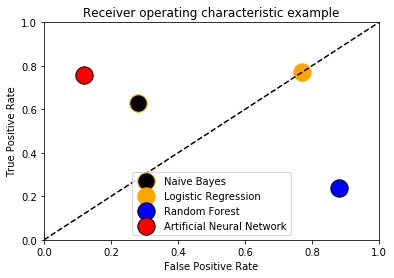

In [35]:
import numpy as np
import matplotlib.pyplot as plt
# fpr, tpr
naive_bayes = np.array([0.28, 0.63])
logistic = np.array([0.77, 0.77])
random_forest = np.array([0.88, 0.24])
ann = np.array([0.12, 0.76])
# plotting
plt.scatter(naive_bayes[0], naive_bayes[1], label = 'Naive Bayes', facecolors='black', edgecolors='orange', s=300)
plt.scatter(logistic[0], logistic[1], label = 'Logistic Regression', facecolors='orange', edgecolors='orange', s=300)
plt.scatter(random_forest[0], random_forest[1], label = 'Random Forest', facecolors='blue', edgecolors='black', s=300)
plt.scatter(ann[0], ann[1], label = 'Artificial Neural Network', facecolors='red', edgecolors='black', s=300)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower center')
plt.show()

# Area Under Curve (AUC)

# Overfitting